<a href="https://colab.research.google.com/github/Mainabryan/real_estate_regression_model/blob/main/background_codines_for_the_real_estate_prediction_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# steps going to take place in these whole project /overview
Import necessary libraries

Load the dataset (from upload or Google Drive)

Inspect the data (head, info, describe, check nulls)

Clean the data (handle missing values, duplicates, datatypes)

Encode categorical variables (label or one-hot encoding)

Scale/normalize features (if needed)

Split the data into training and testing sets

Train the machine learning model

Evaluate the model’s performance

Save or deploy the model (optional)

# import necessary libraries

In [1]:
# import the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score


# load the dataset( Google drive)

In [2]:
df = pd.read_csv('/content/real_estate(2) (1).csv')

# inspect the data(head,info,describe,check nulls)

In [3]:
df.head()

,transaction_date,house_age,transit_distance,local_convenience_stores,latitude,longitude,price_per_unit
0,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [4]:
df.tail()

,transaction_date,house_age,transit_distance,local_convenience_stores,latitude,longitude,price_per_unit
409,2013.000,13.7,4082.01500,0,24.94155,121.50381,15.4
410,2012.667,5.6,90.45606,9,24.97433,121.54310,50.0
411,2013.250,18.8,390.96960,7,24.97923,121.53986,40.6
412,2013.000,8.1,104.81010,5,24.96674,121.54067,52.5
413,2013.500,6.5,90.45606,9,24.97433,121.54310,63.9


In [5]:
df.columns

Index(['transaction_date', 'house_age', 'transit_distance',
       'local_convenience_stores', 'latitude', 'longitude', 'price_per_unit'],
      dtype='object')

In [6]:
df.describe(include='all')

,transaction_date,house_age,transit_distance,local_convenience_stores,latitude,longitude,price_per_unit
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,2013.148971,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,0.281967,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,2012.667000,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,2012.917000,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,2013.167000,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,2013.417000,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,2013.583000,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   transaction_date          414 non-null    float64
 1   house_age                 414 non-null    float64
 2   transit_distance          414 non-null    float64
 3   local_convenience_stores  414 non-null    int64  
 4   latitude                  414 non-null    float64
 5   longitude                 414 non-null    float64
 6   price_per_unit            414 non-null    float64
dtypes: float64(6), int64(1)
memory usage: 22.8 KB


# clean the missing data , uplicate s and find the coreelation within the loaded data and outlieers

In [9]:
df.isnull().sum()

,0
transaction_date,0
house_age,0
transit_distance,0
local_convenience_stores,0
latitude,0
longitude,0
price_per_unit,0


In [10]:
df.duplicated().sum()

np.int64(0)

In [8]:
# check corelation of the prices with any predator
df.corr()

,transaction_date,house_age,transit_distance,local_convenience_stores,latitude,longitude,price_per_unit
transaction_date,1.000000,0.017549,0.060880,0.009635,0.035058,-0.041082,0.087491
house_age,0.017549,1.000000,0.025622,0.049593,0.054420,-0.048520,-0.210567
transit_distance,0.060880,0.025622,1.000000,-0.602519,-0.591067,-0.806317,-0.673613
local_convenience_stores,0.009635,0.049593,-0.602519,1.000000,0.444143,0.449099,0.571005
latitude,0.035058,0.054420,-0.591067,0.444143,1.000000,0.412924,0.546307
longitude,-0.041082,-0.048520,-0.806317,0.449099,0.412924,1.000000,0.523287
price_per_unit,0.087491,-0.210567,-0.673613,0.571005,0.546307,0.523287,1.000000


<Axes: >

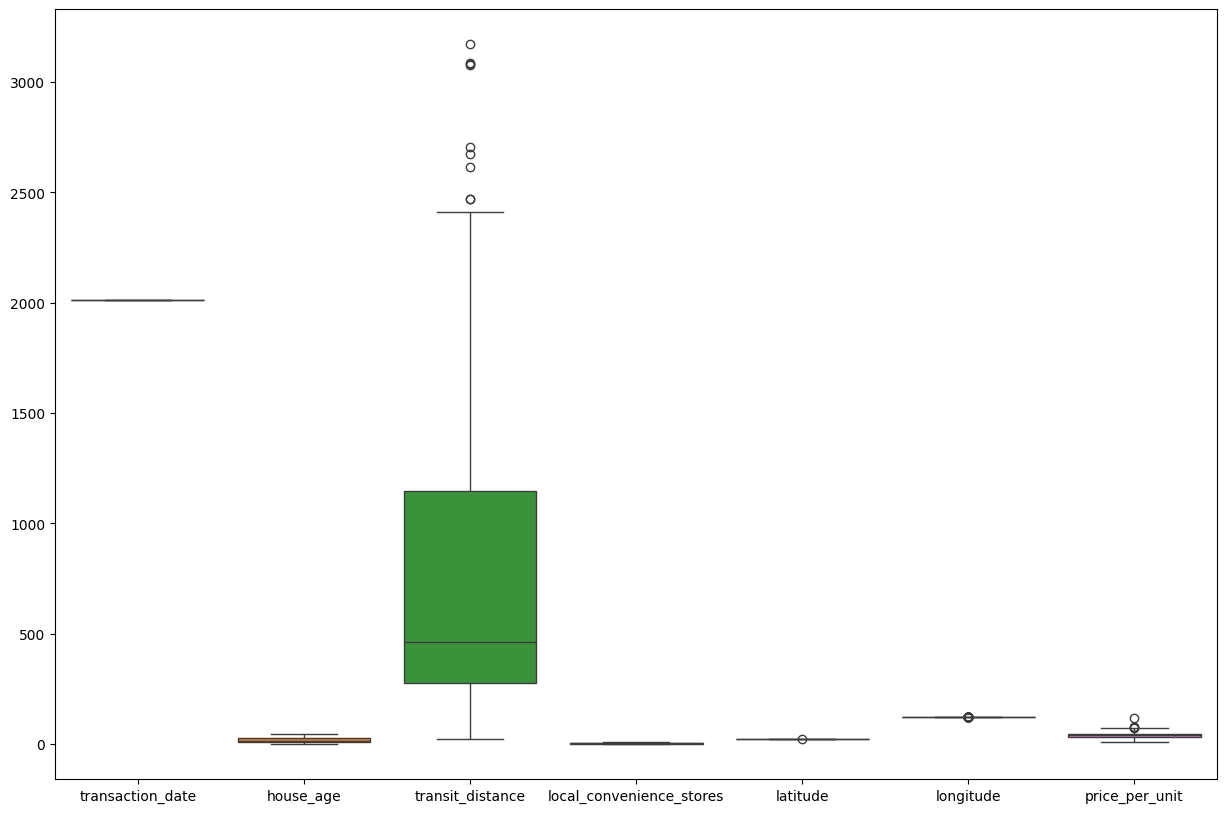

In [13]:
# outliers
plt.figure(figsize=(15,10))
sns.boxplot(data=df)

In [10]:
drop_outliers_IQR

NameError: name 'drop_outliers_IQR' is not defined

In [12]:
def drop_outliers_IQR(df, column):
    """
    Removes outliers from a DataFrame column using the IQR method.

    Args:
        df: pandas DataFrame
        column: str, name of the column to remove outliers from

    Returns:
        pandas DataFrame with outliers removed
    """
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_out = df[(df[column] > lower_bound) & (df[column] < upper_bound)]
    return df_out

# Example usage:
# Assuming 'price' is the column with outliers
df = drop_outliers_IQR(df, 'transit_distance')

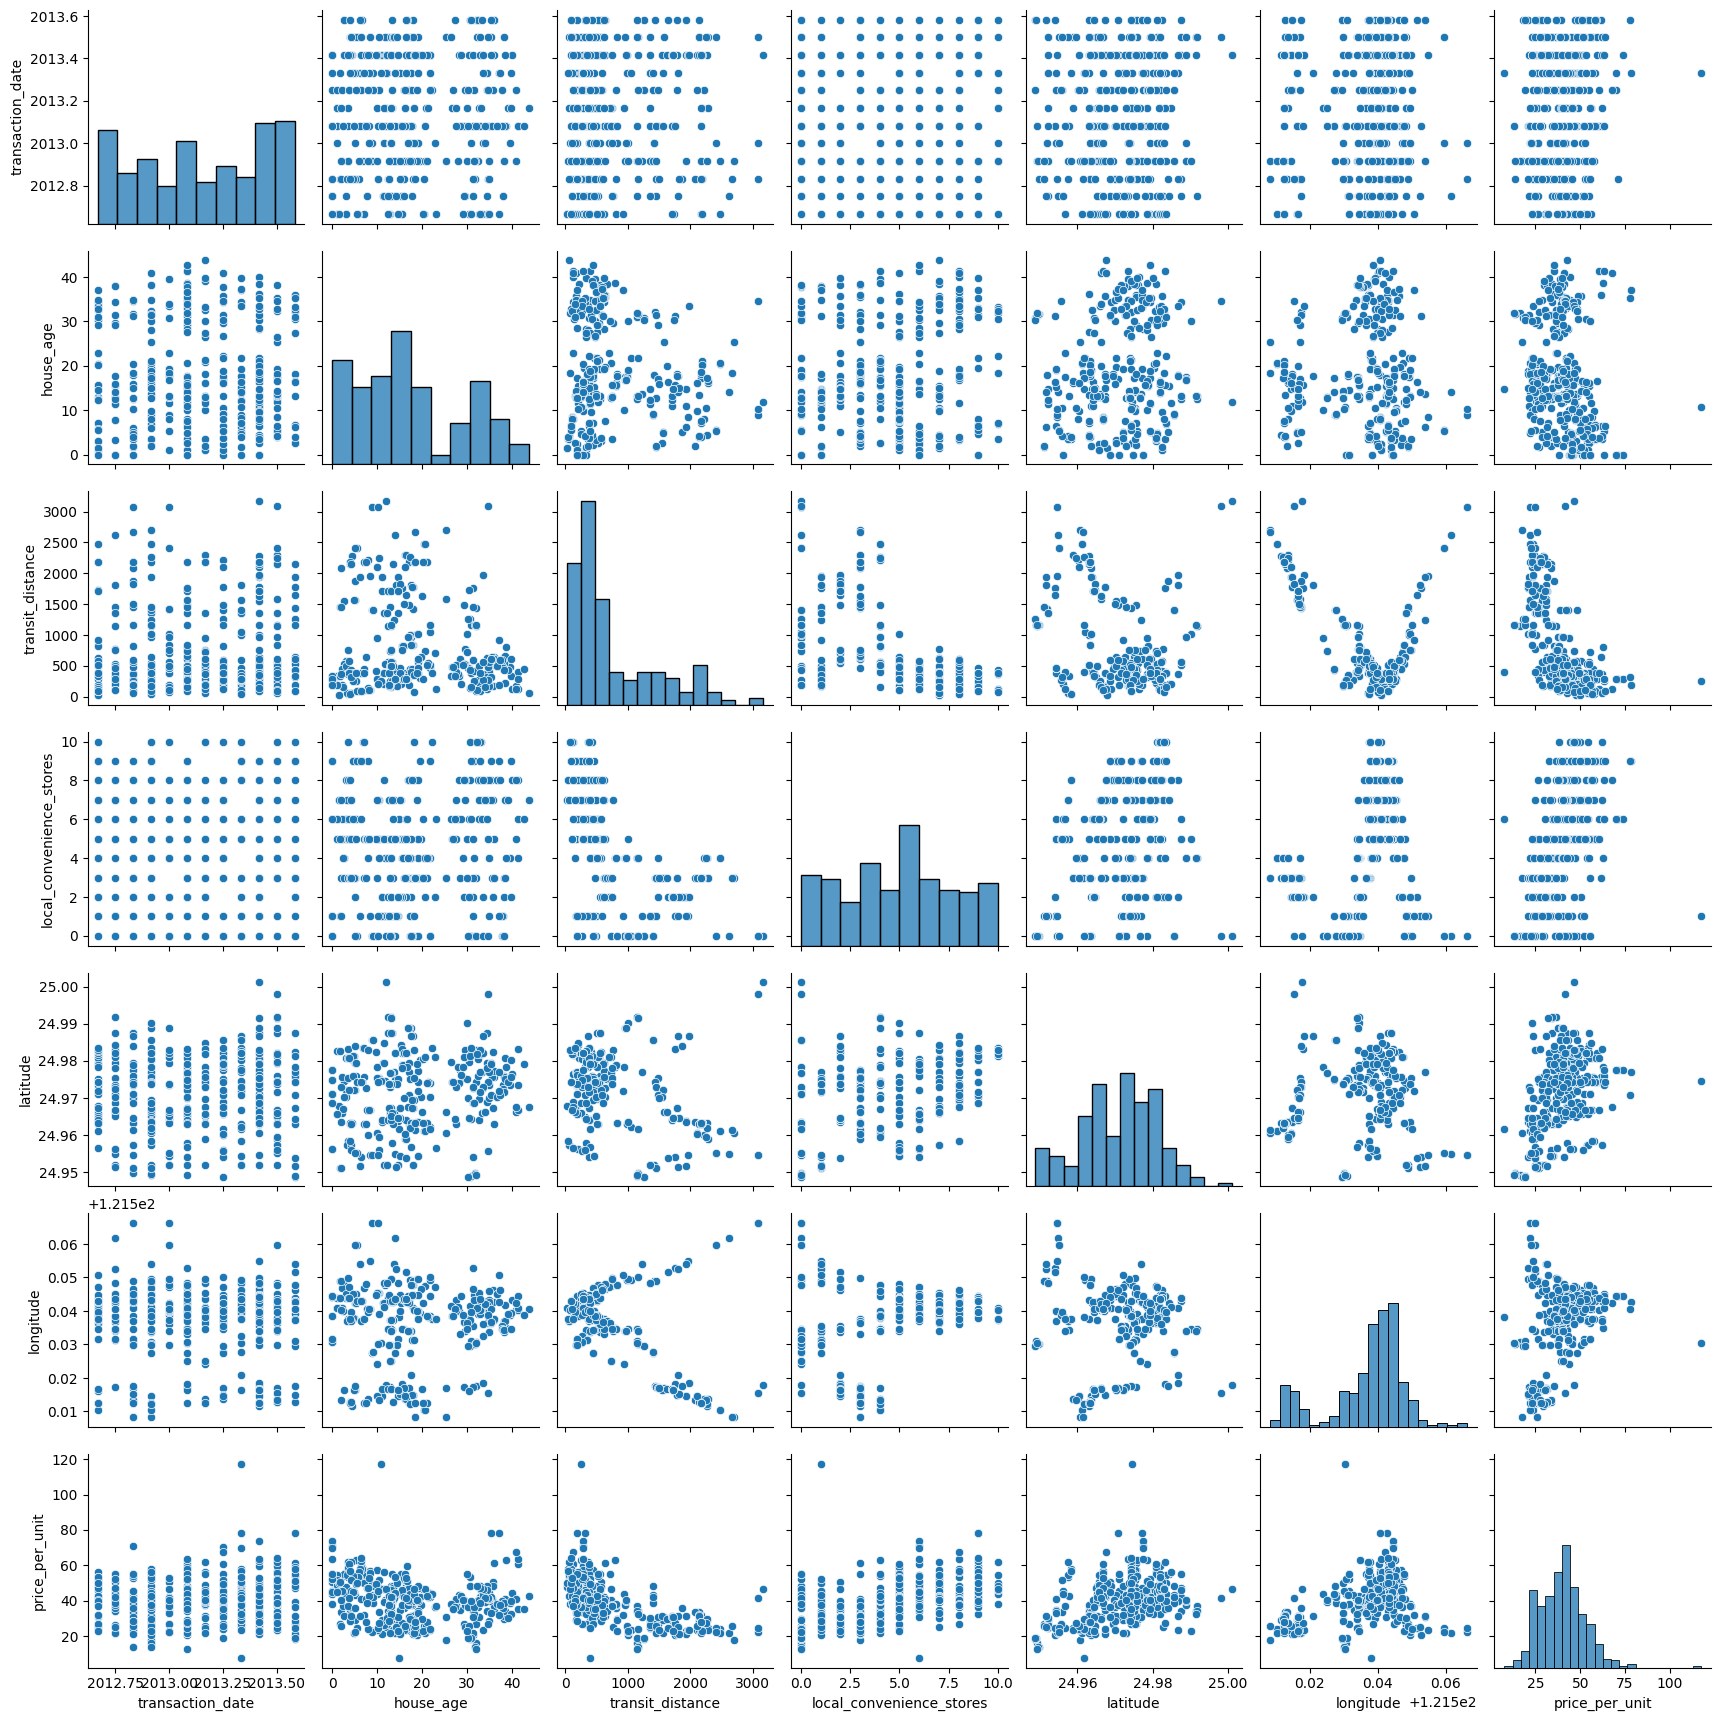

In [14]:
# title plot pairplots
sns.pairplot(df)

# ydata_profiling to identify key info the

In [15]:
!pip install ydata_profiling # install the necessary package
from ydata_profiling import ProfileReport # import the class

# ... other code

profile = ProfileReport(df, title="Pandas Profiling Report") # changed variable name here to ProfileReport
profile.to_file(output_file='Real_estate_report.html')

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 400.1/400.1 kB 19.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 20.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 687.8/687.8 kB 41.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.4/105.4 kB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.3/43.3 kB 3.2 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=2145d3defd254a8fd8715571c9ffa2f26f5a2a862e7801d3581ff8f194064de0
  Stored in directory: /root/.cache/pip/wheels/8d/55/1a/19cd535375ed1ede0c996405ebffe34b196d78e2d9545723a2
Successfully built htmlmin


/usr/local/lib/python3.11/dist-packages/ydata_profiling/utils/dataframe.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={"index": "df_index"}, inplace=True)


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 7/7 [00:00<00:00, 96.70it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

## encode categorical data

In [17]:
df.columns

Index(['transaction_date', 'house_age', 'transit_distance',
       'local_convenience_stores', 'latitude', 'longitude', 'price_per_unit'],
      dtype='object')

In [18]:
X = df [['local_convenience_stores','latitude','longitude']]
y = df['price_per_unit']

# visualize the variabel and the target